# Handling Imbalanced Data for Bank Customer Churn Prediction
Customer churn prediction is to measure why customers are leaving a business. 

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Bank_Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8940,8941,15658148,Udokamma,657,France,Male,38,7,0.00,2,1,0,185827.74,0
1215,1216,15625080,Parkin,745,Spain,Female,54,8,0.00,1,1,0,173912.29,1
6275,6276,15814940,Lawrence,642,Spain,Female,33,9,0.00,2,1,1,150475.14,0
8431,8432,15586752,Parkes,628,Germany,Male,33,8,152143.89,1,1,1,32174.03,0
6886,6887,15670738,Mazzanti,733,Germany,Male,45,2,113939.36,2,1,0,3218.71,0


### Data Exploration

In [3]:
# Drop RowNumber & CustomerID column (it is of no use)
df.drop(['RowNumber', 'Surname', 'CustomerId'], axis='columns', inplace=True)

In [4]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df[df['Exited'] == 0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


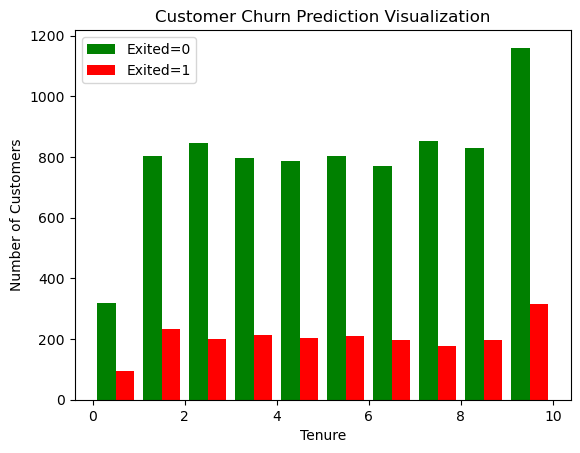

In [6]:
# Data Visualization
tenure_exited_0 = df[df.Exited == 0].Tenure
tenure_exited_1 = df[df.Exited == 1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_exited_0, tenure_exited_1], color=['green', 'red'], label=['Exited=0', 'Exited=1'])
plt.legend()

In [7]:
for col in df:
    print(col)

CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited


In [8]:
def print_unique_col_values(df):
    for column in df:
        print(f"{column} --> {df[column].dtypes} : {df[column].unique()}")

In [9]:
print_unique_col_values(df)

CreditScore --> int64 : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 49

In [10]:
df['Gender'].replace({'Female':1, 'Male':0}, inplace=True)

C:\Users\suman\AppData\Local\Temp\ipykernel_16964\3407678644.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Female':1, 'Male':0}, inplace=True)
C:\Users\suman\AppData\Local\Temp\ipykernel_16964\3407678644.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].re

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


#### Using One hot encoding for column "Geography"

In [12]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [13]:
df1.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
966,563,1,34,6,139810.34,1,1,1,152417.79,0,True,False,False
857,741,0,39,7,143637.58,2,0,1,174227.66,0,False,False,True
147,650,0,37,5,106967.18,1,0,0,24495.03,0,True,False,False


In [14]:
# Convert all boolean columns to integers
df1 = df1.applymap(lambda x: int(x) if isinstance(x, bool) else x)
df1.dtypes

C:\Users\suman\AppData\Local\Temp\ipykernel_16964\756362938.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = df1.applymap(lambda x: int(x) if isinstance(x, bool) else x)


CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

In [15]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


### Preprocessing/Scaling

In [16]:
cols_to_scale = ['CreditScore', 'Tenure', 'Balance', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [17]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
276,0.812,0,62,0.3,0.000000,1,1,1,0.055943,1,1,0,0
2185,0.778,0,40,0.1,0.437156,1,1,1,0.966641,0,0,0,1
4967,0.542,0,40,0.8,0.694014,3,1,0,0.862478,1,0,1,0
3660,0.288,0,27,0.2,0.000000,2,1,0,0.111976,0,0,0,1
5556,0.512,0,40,0.6,0.476296,2,1,0,0.233839,0,1,0,0


In [18]:
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [19]:
X = df1.drop('Exited', axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [20]:
X_train.shape, y_train.shape

((8000, 12), (8000,))

In [21]:
X_test.shape, y_test.shape

((2000, 12), (2000,))

In [22]:
len(X_train.columns)

12

### Building an ANN model

In [23]:
from tensorflow_addons import losses

C:\Users\suman\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [24]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(12, input_dim=12, activation='relu'),
        keras.layers.Dense(6, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight=weights)
        
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [26]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5575 - accuracy: 0.7951
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.7980
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.8040
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4488 - accuracy: 0.8116
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.8133
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.8138
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.8169
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.8145
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.8188
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4317 - accura

250/250 [==============================] - 0s 988us/step - loss: 0.3987 - accuracy: 0.8363
Epoch 81/100
250/250 [==============================] - 0s 956us/step - loss: 0.3997 - accuracy: 0.8335
Epoch 82/100
250/250 [==============================] - 0s 980us/step - loss: 0.4008 - accuracy: 0.8356
Epoch 83/100
250/250 [==============================] - 0s 966us/step - loss: 0.3978 - accuracy: 0.8375
Epoch 84/100
250/250 [==============================] - 0s 944us/step - loss: 0.4012 - accuracy: 0.8359
Epoch 85/100
250/250 [==============================] - 0s 946us/step - loss: 0.3989 - accuracy: 0.8339
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4007 - accuracy: 0.8353
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8307
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3969 - accuracy: 0.8388
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3996 

## Mitigating Skewness of Data

### Method 1: Undersampling

In [30]:
# Class count
count_class_0, count_class_1 = df1.Exited.value_counts()
# Divide by class
df_class_0 = df1[df1['Exited'] == 0]
df_class_1 = df1[df1['Exited'] == 1]

In [31]:
df_class_0.shape

(7963, 13)

In [32]:
df_class_1.shape

(2037, 13)

In [33]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print("Random under-sampling:")
print(df_test_under.Exited.value_counts())

Random under-sampling:
Exited
0    2037
1    2037
Name: count, dtype: int64


In [36]:
X = df_test_under.drop('Exited', axis='columns')
y = df_test_under['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [37]:
y_train.value_counts()

Exited
1    1630
0    1629
Name: count, dtype: int64

In [38]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 2s 3ms/step - loss: 1.2690 - accuracy: 0.4544
Epoch 2/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.4916
Epoch 3/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6734 - accuracy: 0.5750
Epoch 4/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6565 - accuracy: 0.6352
Epoch 5/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6422 - accuracy: 0.6382
Epoch 6/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6266 - accuracy: 0.6640
Epoch 7/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6179 - accuracy: 0.6769
Epoch 8/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6101 - accuracy: 0.6784
Epoch 9/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.6852
Epoch 10/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5993 - accura

102/102 [==============================] - 0s 3ms/step - loss: 0.5358 - accuracy: 0.7432
Epoch 82/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5338 - accuracy: 0.7321
Epoch 83/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5375 - accuracy: 0.7355
Epoch 84/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5279 - accuracy: 0.7475
Epoch 85/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.7373
Epoch 86/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5293 - accuracy: 0.7367
Epoch 87/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5325 - accuracy: 0.7407
Epoch 88/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5256 - accuracy: 0.7410
Epoch 89/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5263 - accuracy: 0.7404
Epoch 90/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 

### Method 2: Oversampling

In [39]:
# Oversample 1-class and concat DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Exited.value_counts())

Random over-sampling:
Exited
0    7963
1    7963
Name: count, dtype: int64


In [40]:
X = df_test_over.drop('Exited',axis='columns')
y = df_test_over['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [41]:
y_train.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64